In [3]:
# preliminaries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Exponential Sampler

The exponential distribution is,
$$f(x; \lambda) = \lambda \exp(-\lambda x), ~~~x>0.$$

Using the transformation method, $x = F^{-1}(u)$,
$$x = \frac{-\ln(1 - u)}{\lambda}.$$

In [7]:
def myExponentialSampler(lam, num):
    u = np.random.random((num,1))
    x = -np.log(1-u)/lam
    return x

Text(0, 0.5, 'p(x)')

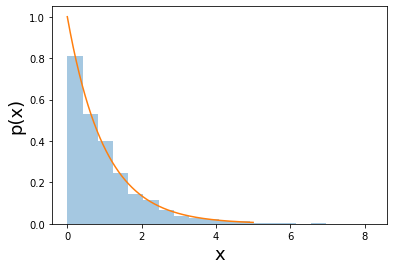

In [10]:
# sample points
x = myExponentialSampler(1.0, 5000)
plt.hist(x, 20, density=True, alpha=0.4)

# overlay PDF
xi = np.linspace(0.0,5,1000)
lam = 1.0; fexp = lam*np.exp(-lam*xi)
plt.plot(xi, fexp, '-')

plt.xlabel('x', fontsize='18')
plt.ylabel('p(x)', fontsize='18')

In [11]:
u = np.random.random(10000)

In [12]:
x = 2*u - 1

(array([0.49914242, 0.49214042, 0.49814214, 0.50464399, 0.50864513,
        0.50314356, 0.483638  , 0.50964542, 0.50664456, 0.49564142]),
 array([-9.99762030e-01, -7.99819096e-01, -5.99876162e-01, -3.99933229e-01,
        -1.99990295e-01, -4.73616299e-05,  1.99895572e-01,  3.99838506e-01,
         5.99781439e-01,  7.99724373e-01,  9.99667306e-01]),
 <a list of 10 Patch objects>)

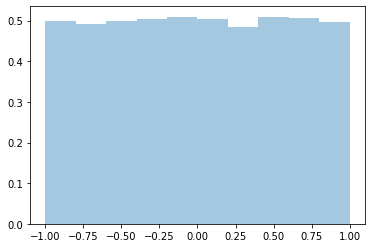

In [13]:
plt.hist(x, 10, density=True, alpha=0.4)

# Accept-Reject Example

$$f(x) = \frac{3}{8} (1+x^2), ~~~ -1 \leq x \leq 1$$


In [1]:
def acceptRejectExample(ndarts, isPlot=True):
  
    xmin = -1.
    xmax = 1.
    fmax = 3./4
    
    x  = np.random.uniform(xmin, xmax, ndarts)
    u  = np.random.uniform(0., fmax, ndarts)
    fx = 3./8. * (1 + x**2)
    
    y  = x[u <= fx]
    
    if isPlot:
      xi = np.linspace(-1,1); fi = 3./8. * (1 + xi**2)
      plt.plot(y, u[u < fx],'o', alpha=0.4)
      plt.plot(x[u > fx], u[u > fx],'o', alpha=0.4)
      plt.plot(xi, fi,'k-')
    
    return y

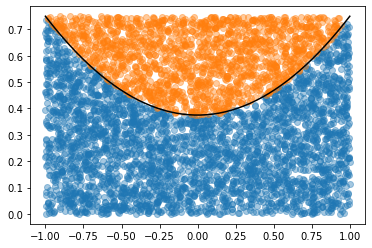

In [6]:
x = acceptRejectExample(5000, isPlot=True)

In [16]:
x.shape

(3315,)

(array([0.67725342, 0.65958594, 0.61541724, 0.53591358, 0.52707984,
        0.50646778, 0.43874243, 0.45640991, 0.33568213, 0.35629419,
        0.40340747, 0.37101709, 0.33568213, 0.44463159, 0.37101709,
        0.53002442, 0.51235694, 0.59480518, 0.64191846, 0.69197632]),
 array([-9.99962731e-01, -9.00019530e-01, -8.00076329e-01, -7.00133128e-01,
        -6.00189927e-01, -5.00246726e-01, -4.00303525e-01, -3.00360325e-01,
        -2.00417124e-01, -1.00473923e-01, -5.30721843e-04,  9.94124791e-02,
         1.99355680e-01,  2.99298881e-01,  3.99242082e-01,  4.99185283e-01,
         5.99128484e-01,  6.99071684e-01,  7.99014885e-01,  8.98958086e-01,
         9.98901287e-01]),
 <BarContainer object of 20 artists>)

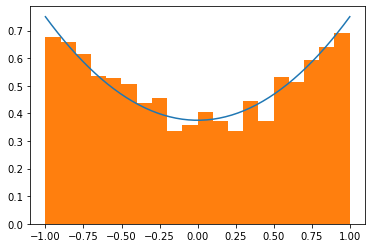

In [8]:
xi = np.linspace(-1,1); fi = 3./8. * (1 + xi**2)
plt.plot(xi, fi)
plt.hist(x, 20, density=True)

# Adaptive Rejection Sampling

In [19]:
!pip3 install ARSpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ARSpy: filename=ARSpy-0.4-py3-none-any.whl size=14215 sha256=878041392c978a85731402a4169b232b648172176b5c48e17def01a04dfb3b5c
  Stored in directory: /root/.cache/pip/wheels/82/6d/9a/5c27926e92572bf7086887871f3dfc13a60cb9fa27d4a07296
Successfully built ARSpy


In [20]:
from arspy.ars import adaptive_rejection_sampling

example_logpdf = lambda x: -x**2

a, b = -0.5, 0.5  # a < b must hold
domain = (-np.inf, np.inf)
n_samples = 10000

In [21]:
samples = adaptive_rejection_sampling(logpdf=example_logpdf, a=a, b=b, domain=domain, n_samples=n_samples)

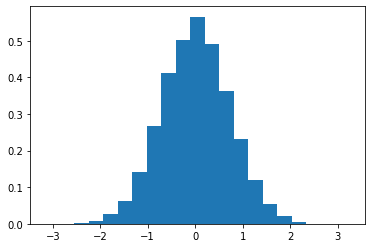

In [22]:
_ = plt.hist(samples, 21, density=True)

# Pointers on Inverse Interpolation

In the transformation method, sometimes it is difficult to solve $u = F(x)$ in terms of $x = F^{-1}(u)$.

For smooth $F(x)$ we can sometimes use interpolation, instead of numerically trying to solve for $x$. This is typically cheaper than a nonlinear solver in terms of floating point operations. Furthermore, we don't have to triage multiple solutions (typical for nonlinear equations) and decide which one is appropriate for our domain.

Consider the example above:

$$f(x) = \frac{3}{8} (1+x^2), ~~~ -1 \leq x \leq 1$$

First, we find the CDF to be $F(x) = (x^3 + 3x + 4)/8$.

Text(0, 0.5, 'F(x)')

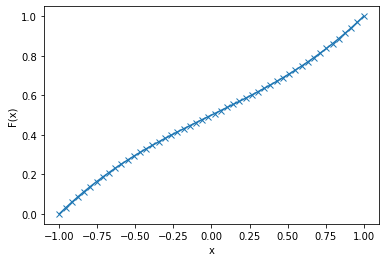

In [23]:
# Define the PDF over (say) 100 points on the domain
xi = np.linspace(-1,1)
Fx = lambda x: 1./8 * (x**3 + 3*x +4)
Fi = Fx(xi)

# plot x v/s F
plt.plot(xi, Fi, 'x-')
plt.xlabel('x')
plt.ylabel('F(x)')

Text(0.5, 0, 'F(x)')

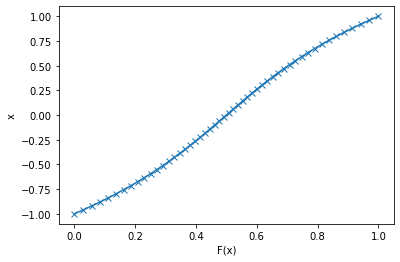

In [24]:
# plot F versus x;
plt.plot(Fi, xi, 'x-')
plt.ylabel('x')
plt.xlabel('F(x)')

We can now solve $u = F(x)$ by interpolation. That is, we take $u \in [0,1] = F(x)$ and use the curve above to find out what $x$ it corresponds to.

In [25]:
# smooth F(x) can use cubic interpolation
from scipy.interpolate import interp1d
Finv = interp1d(Fi, xi, 'cubic')

Finv(0.8) = 0.6903366437688296


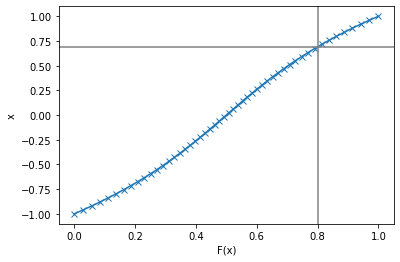

In [26]:
# test
x = 0.8; print('Finv(' + str(x) + ') = ' + str(Finv(x)))
# plot F versus x;
plt.plot(Fi, xi, 'x-')
plt.ylabel('x')
plt.xlabel('F(x)')
plt.axvline(x=x, c='gray')
plt.axhline(y=Finv(x), c='gray')

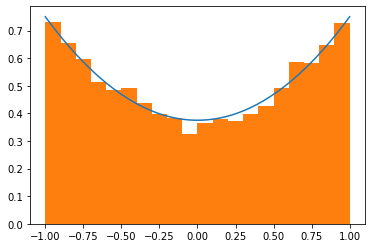

In [27]:
# test inverse sampling
u = np.random.uniform(0,1, 10000)
x = Finv(u)

xi = np.linspace(-1,1); fi = 3./8. * (1 + xi**2)

plt.plot(xi, fi)
_ = plt.hist(x, 20, density=True)